# Projet Speed Dating - Enoncé

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

---------------------------------

### Pour cette étude je vais essayer d'étudier quelques "on dit" sur "l'art de la drague" et les relations amoureuses, à savoir:
 - Avoir réussi, de l'argent et/ou une "belle profession" aide
 - être "beau" rend la chose facile
 - Avoir confiance en soit, être sur de soi est un atout

### D'abord on récupére nos données à partir du fichier csv source

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [17]:
# On commence par importe la librairie panda pour pouvoir travailler sur les données
dataset = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")

### On va maintenant checker quelques informations de base sur notre dataset


In [18]:
#On regarde d'abord les infos générales de notre dataset: nombre de lignes, colonnes, types de données
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [19]:
#On regarde maintenant une partie du dataset pour commencer à se l'approprier
dataset.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [20]:
#Avec discribe() on va faire ressortir quelques statistiques sur notre dataset afin de faire une première analyse globale
dataset.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Observations:

Avec la ligne count on peut déja déceler des données manquantes. Certaines colonnes ont le même nombre que le nombde de ligne du tableau (exemple iid) tandis que d'autres n'affichent un nombre différent voir bien inférieur (comme par exemple la colonne attr3_3)

Avec la moyenne de la colonne mean on peut déduire que la proportion hommes/femmes a été équitable lors de l'étude: Dans les données, les hommes ont la valeur 1 et les femmes 0 et le resultat est extremement proche de 0,5.

In [21]:
dataset['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

Il semble que trés peu de match aient eu lieu pendant ces speed dating, on va se concentrer sur ceux-ci un peu plus tard

In [52]:
#Je garde uniquement les lignes ou les participants se sont notés de 0 a 10 ( contre le système a point dans queques vagues).
dataset = dataset.dropna(subset='attr3_1')

In [29]:
dataset.shape

(8273, 195)

## AXE 1 : Relation entre la profession/l'argent et les matchs

On va regarder le nombre de match par catégorie de métier

On note que certains metiers se demarquent en terme de match avec la finance en grand top 1 et on a des resultats assez disparates mais regardons proportionellement

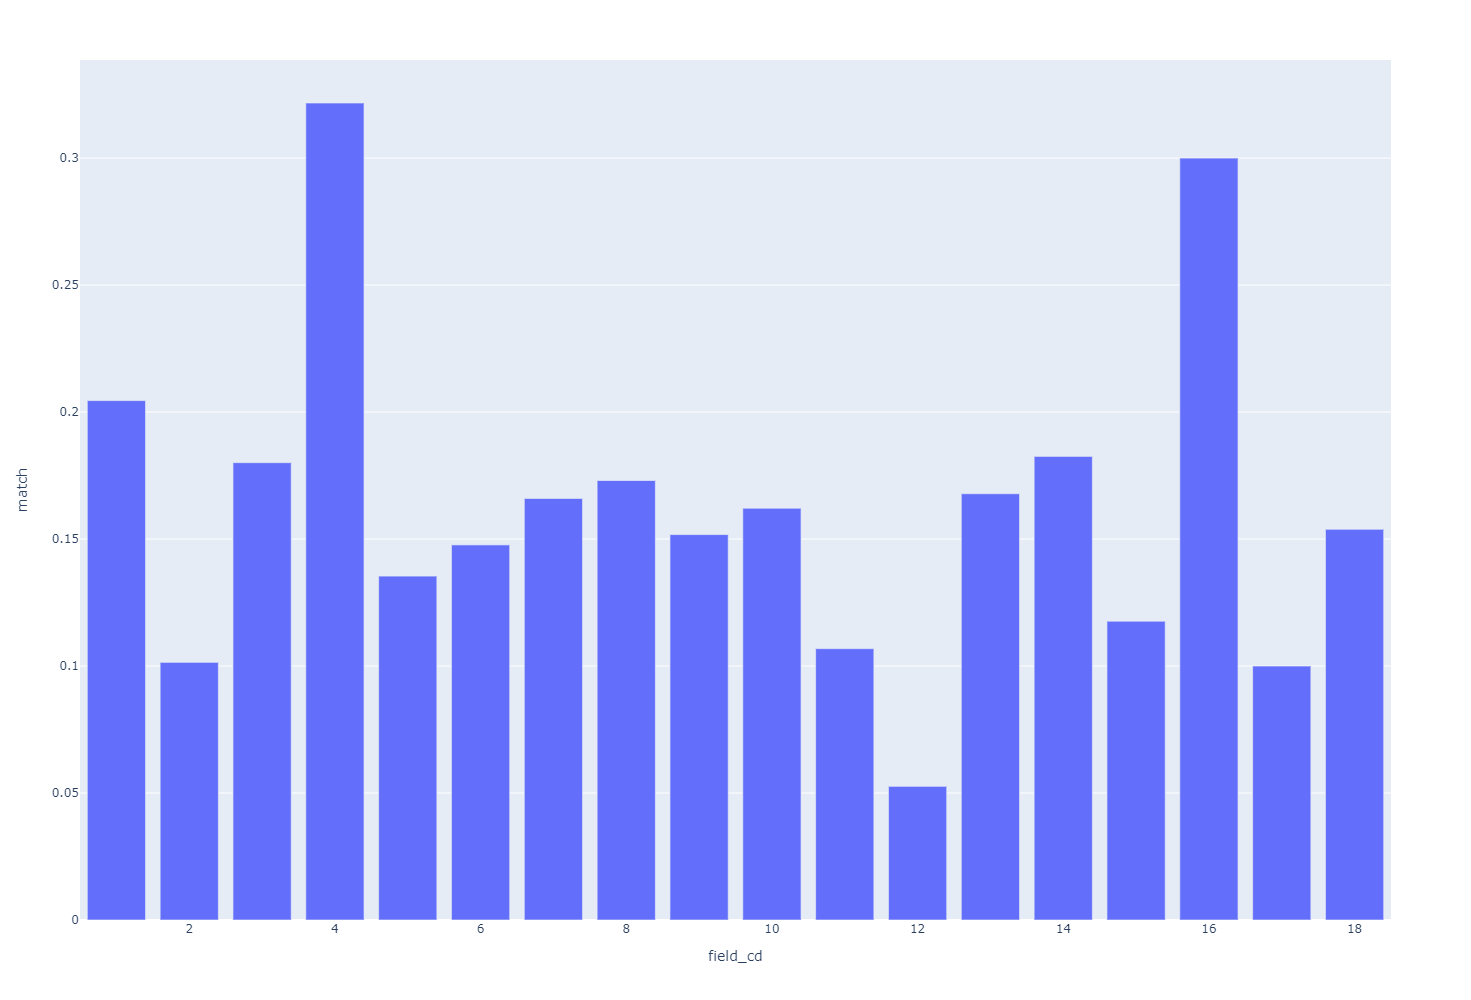

In [31]:
 d = dataset.groupby('field_cd')['match'].mean()
fig = px.bar(d, x = d.index , y = 'match' , width=1000, height=1000 )

fig.show()

Proportionellement les resultats sont moins dispersés mais on peut quand même noter que 2 secteurs se demarquent vers le haut et un autre vers le bas.
Les 2 premiers du classements sont les catégories 4 et 16, respectivement Le medical/pharmaceutique et les langues. Le bon dernier, nettement inférieur aux autres est la catégorie 12
"undergrd/undecided" autrement dit les personnes pas (encore) diplomées de l'enseignement supérieur.





#### Conclusion Axe 1: 
En moyenne, le secteur (ou la situation) professionel(le) semble avoir un impact faible sur le nombre de match mais il apparait tout de même que certains secteurs ou situations auront un impact plus ou moins positif sur la capacité du participant à matcher. Cela n'est pas forcement surprenant, il est logique de penser que dans la  recherche d'un partenaire, sa capacité à subvenir à ses besoins et participer aux frais du couple soit un critère.

A noter que les catégories ayant obtenus les meilleurs resultats sont connues pour être "bien payées/prestigieuses/attrayantes".

## AXE 2 : Relation l'assurance/la beauté et les matchs

Il a été demandé aux participants de se noter eux mêmes sur plusieurs critères: leur beauté, honneteté, intelligence, humour et ambition.
Je suppose que les personnes sures d'elles auront tendances à se mettre de bonnes notes et à l'inverse les personnes peu sures d'elles baisseront leur notre.
Je propose de rechercher une eventuelle relation entre es notes et les matchs

### Axe 2.1: Relation entre la note de "beauté" et le nombre de match

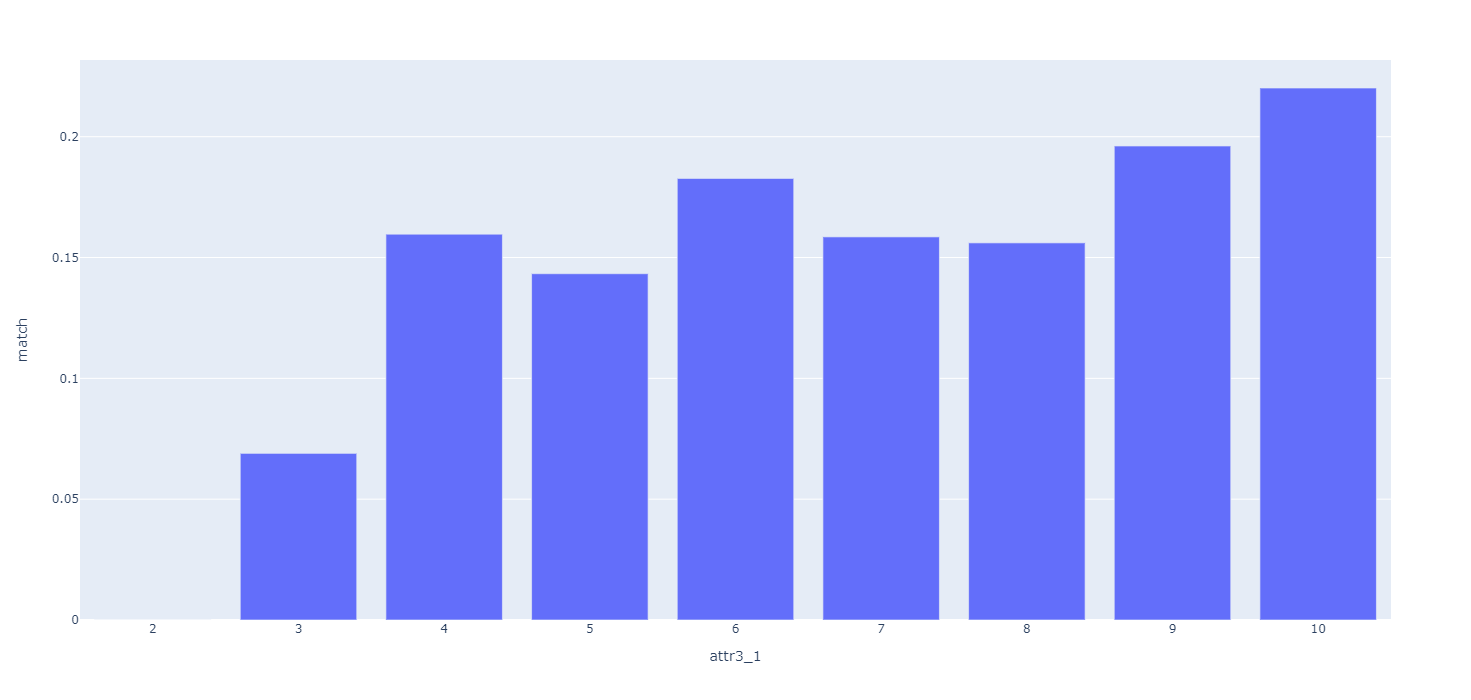

In [32]:
attr_group = dataset.groupby('attr3_1')['match'].mean()
fig = px.bar(attr_group, x = attr_group.index , y = 'match' , width=1000, height=700 )

fig.show()

### Axe 2.2: Relation entre la note de globale et le nombre de match

In [33]:
# On va calculer la moyenne des 5 notes
dataset['global_mark'] = dataset[['attr3_1' , 'sinc3_1' , 'intel3_1' , 'fun3_1' , 'amb3_1']].mean(axis=1)

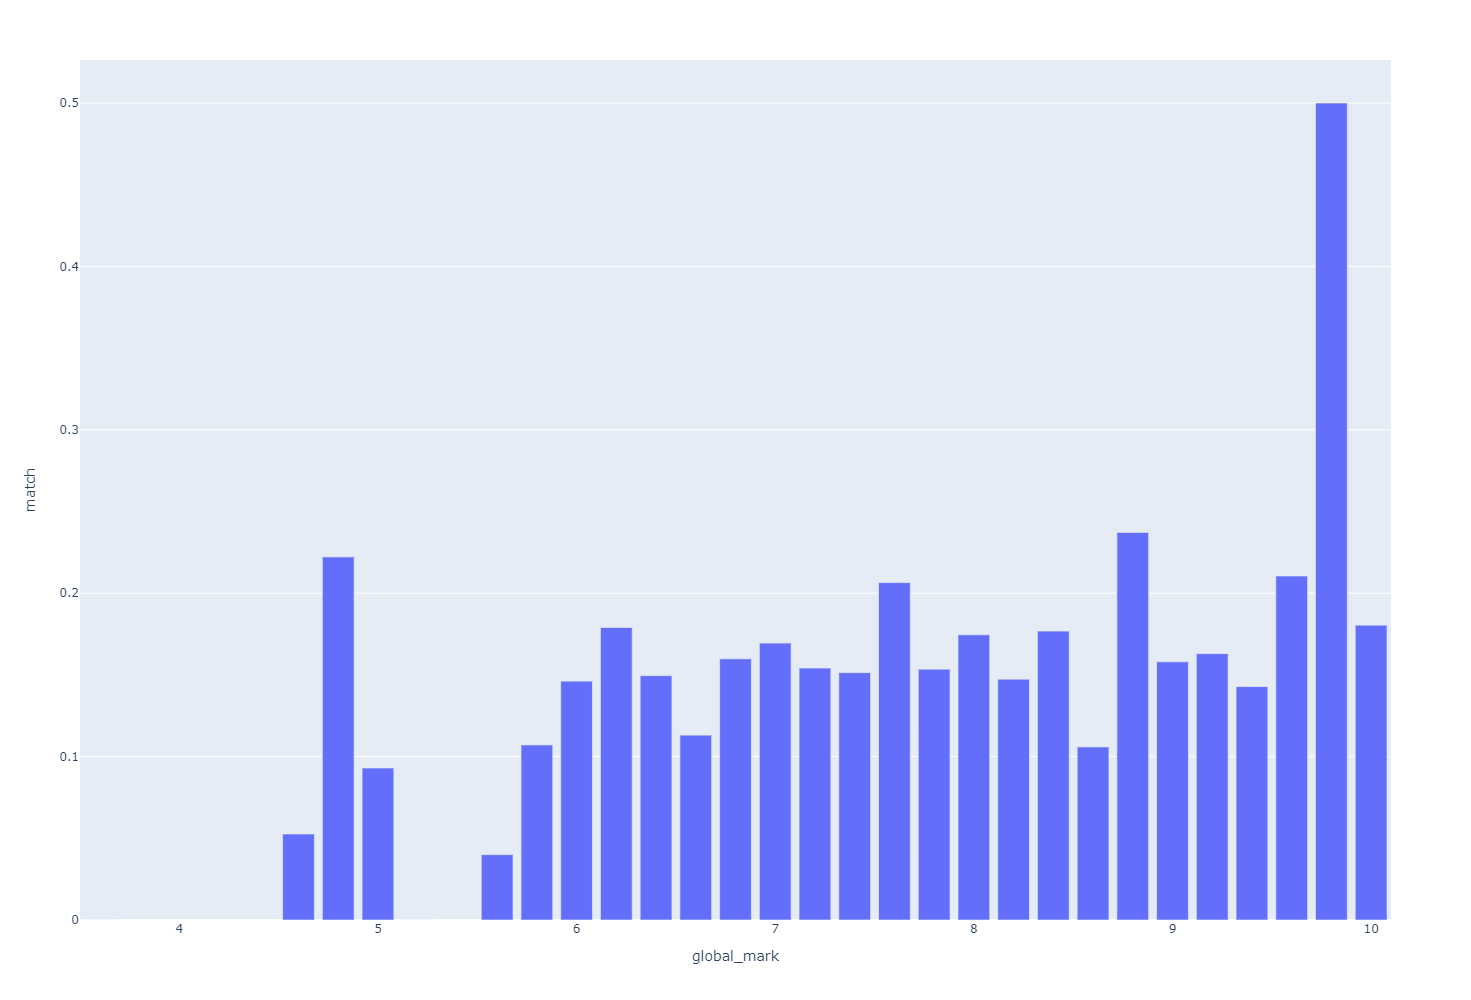

In [34]:
mark_group = dataset.groupby('global_mark')['match'].mean()
fig = px.bar(mark_group, x = mark_group.index , y = 'match' , width=1000, height=1000 )

fig.show()

--------------------------------------------


Maintenant que nous avons des informations sur les matchs en fonction des notes auto-attribuées par les participants. Voyons si la tendance reste la même avec les notes qu'ils se sont attribuées par rapport à l'image qu'ils pensent renvoyer aux autres.

Je vais comparer les 2 notes ( beauté et globale) dans les 2 cas. Un chiffre supérieur à 0 pourra reprsenter quelqu'un sur de lui, car il pensera dégager une meilleur image que celle qu'il à de lui même. A l'inverse quelqu'un de peu sur de lui sera représenté par un chiffre inférieur à 0. La personne pensera dégager une moins bonne image que celle qu'elle à d'elle même.

Bien sur, une personne sur d'elle pourra également se mettre de bonnes notes dans les 2 cas, comme une personne peu sûre d'elle se mettra probablement de mauvaises notes.

Observons tout de même les statistiques.

In [35]:
dataset['delta_attr'] =   dataset['attr5_1'] - dataset['attr3_1']
dataset['global_estimate'] = dataset[['attr5_1' , 'sinc5_1' , 'intel5_1' , 'fun5_1' , 'amb5_1']].mean(axis=1)
dataset['delta_global'] =  dataset['global_estimate'] - dataset['global_mark']

In [36]:
df_compar = dataset.dropna(subset = ['delta_attr','delta_global'])

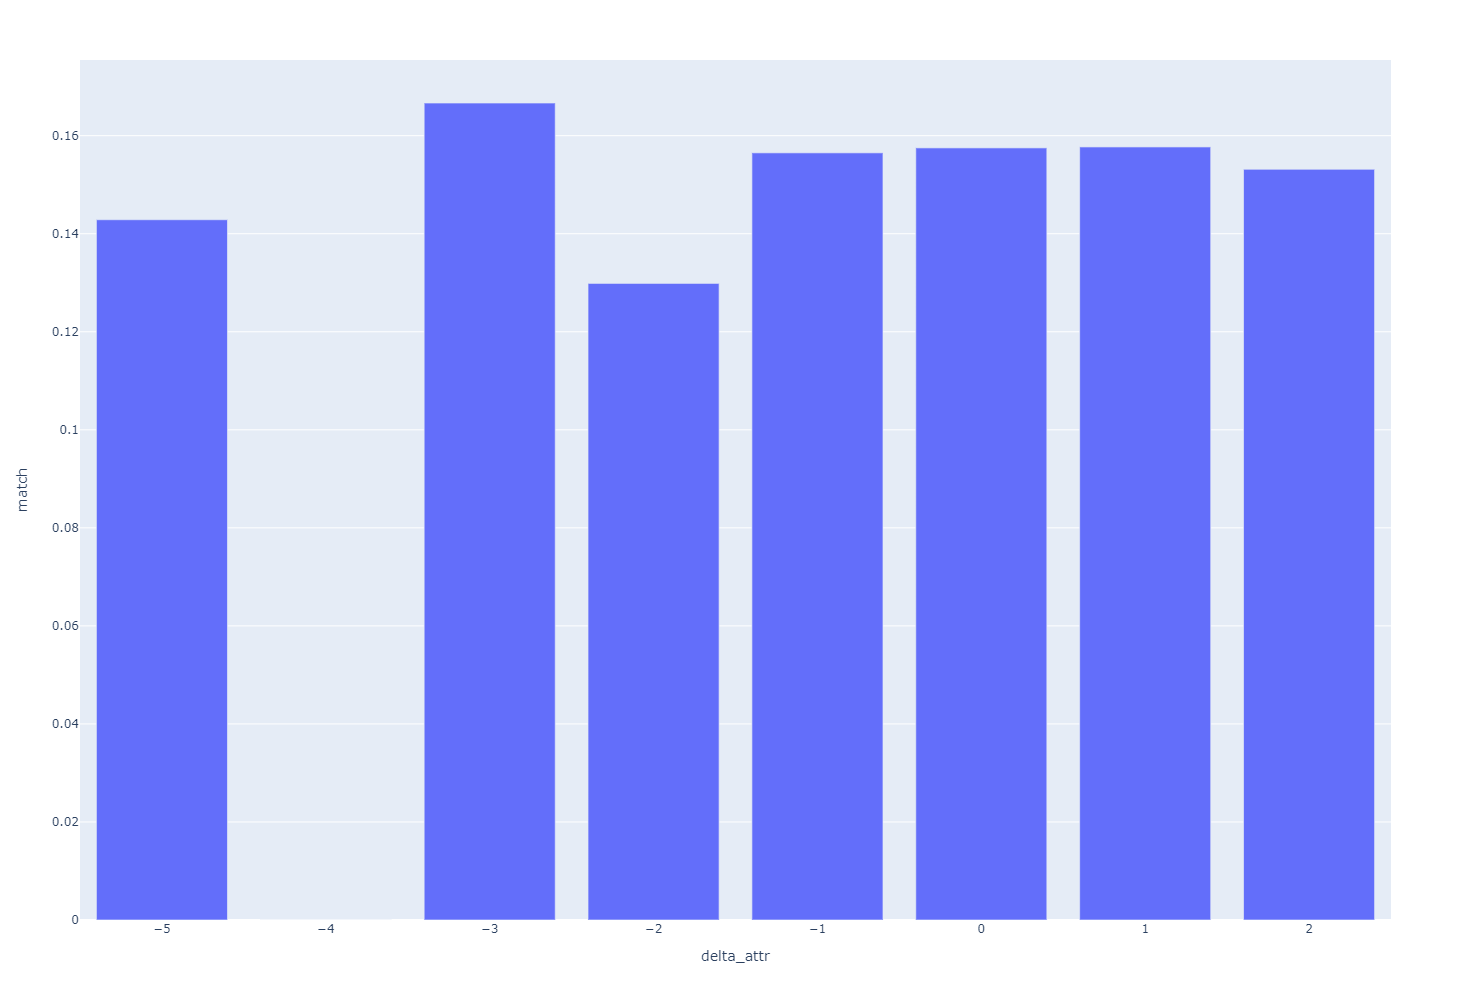

In [37]:
delta_attr_group = dataset.groupby('delta_attr')['match'].mean()
fig = px.bar(delta_attr_group , x = delta_attr_group.index , y = 'match' , width=1000, height=1000 )

fig.show()

Il semble que la différence entre l'opinion de soi et le sentiment de l'image renvoyée aux autres n'ait pas eu d'impact.

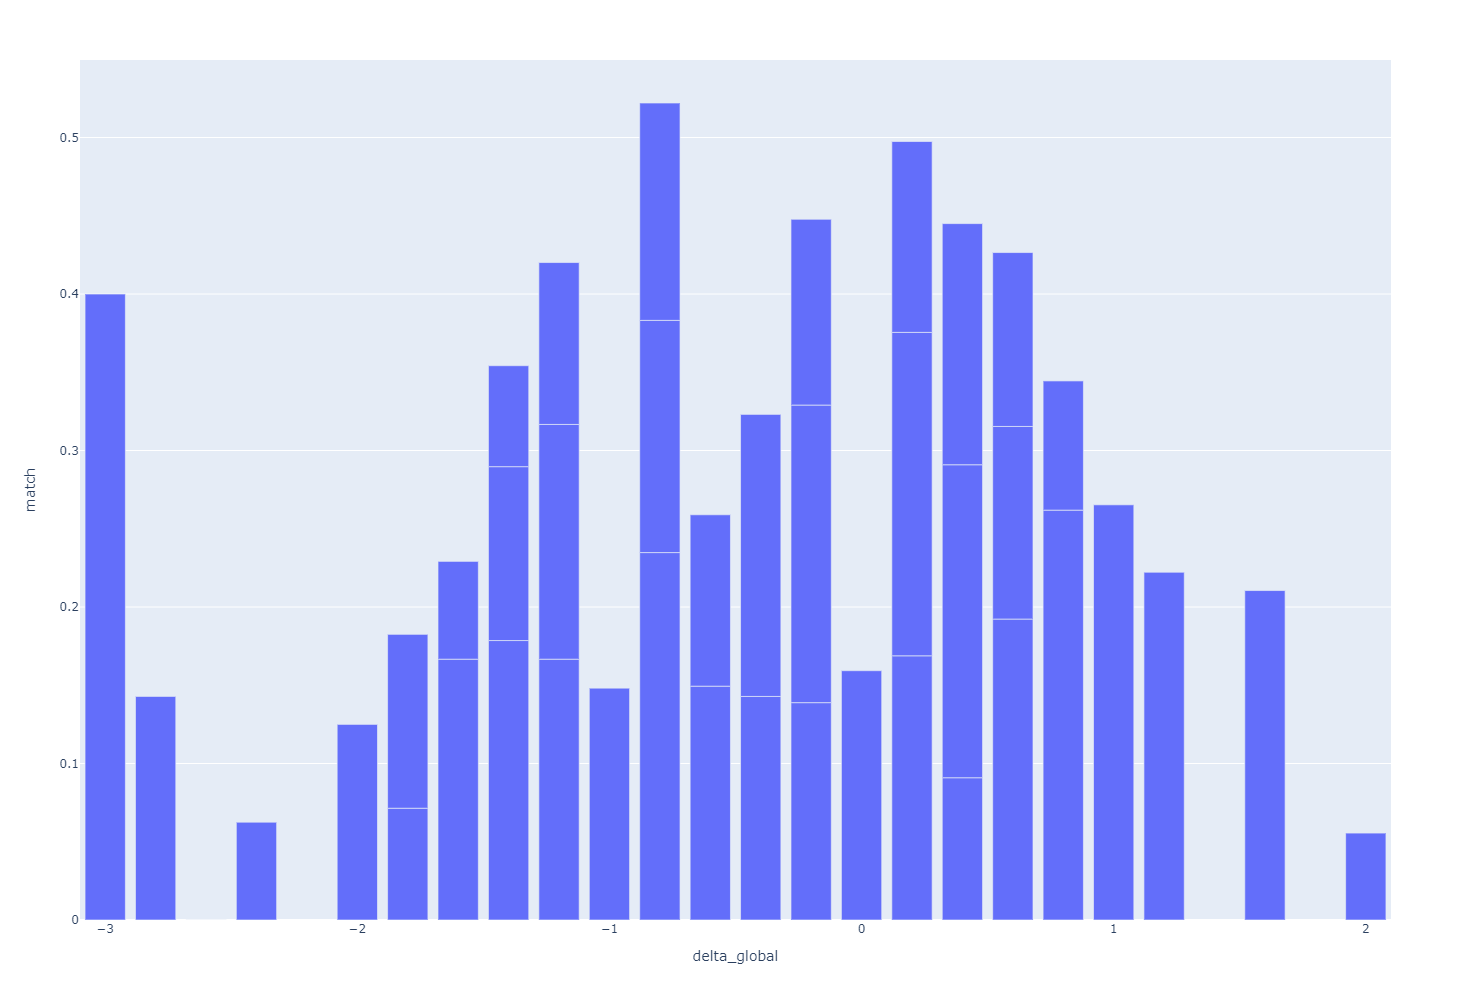

In [38]:
delta_global_group = dataset.groupby('delta_global')['match'].mean()
fig = px.bar(delta_global_group , x = delta_global_group.index , y = 'match' , width=1000, height=1000 )

fig.show()

Comme pour la note de beauté physique, le delta entre les deux types de notations rempli par les candidats ne montre pas de tendance ou d'impact visible.

#### Conclusion Axe 2:
Difficile de representer la confiance en soi avec les données disponibles. On peut cependant noter que la différence entre l'image que les participants ont d'uex mêmes et celles qu'ils pensent renvoyer n'a à priori pas d'impact sur leur potentiels match.

On peut se demander si cela est du au contexte du speed dating. L'expérience étant mise en place par des tiers, les participants peuvent être stréssés, intimidés, etc. Cet axe de travail n'aura en tout cas pas mis en lumière de facteur décisif mais on peut tout de même noter que plus les notes auto-attibuées sont hautes, plus le nombre de match augmente notamment pour la note de beauté physique.

## Axe 3 : Etude combinée des critères liés à l'emploi et aux notes personelles

Pour cette partie je vais me focaliser uniquement sur les catégories d'emploi ayant eux les meilleurs resulats aux speed datings et celles ayant eux les moins bonnes et je vais chercher à observer si les notes des participants de ces catégories ont eu un impact ou non sur leur nombre de match

### Partie A : Impact des notes au sein des catégories prisées ou non

In [39]:
# On va reduire le dataset aux critères qui nous intérèssent pour la suite, à savoir, les domaines professionels, les notes (beauté et globale), les match ainsi que le genre
df_axe3A = dataset[ ['field_cd', 'gender' , 'attr3_1', 'global_mark','match']]

#definition des liste des catégories professionelles à conserver
field_up_list = [4,16,1]
field_bottom_list = [2 , 11, 12, 17]

#segmentation du nouveau dataframe

df_up = df_axe3A[ df_axe3A['field_cd'].isin(field_up_list)]
df_down = df_axe3A[ df_axe3A['field_cd'].isin(field_bottom_list) ]

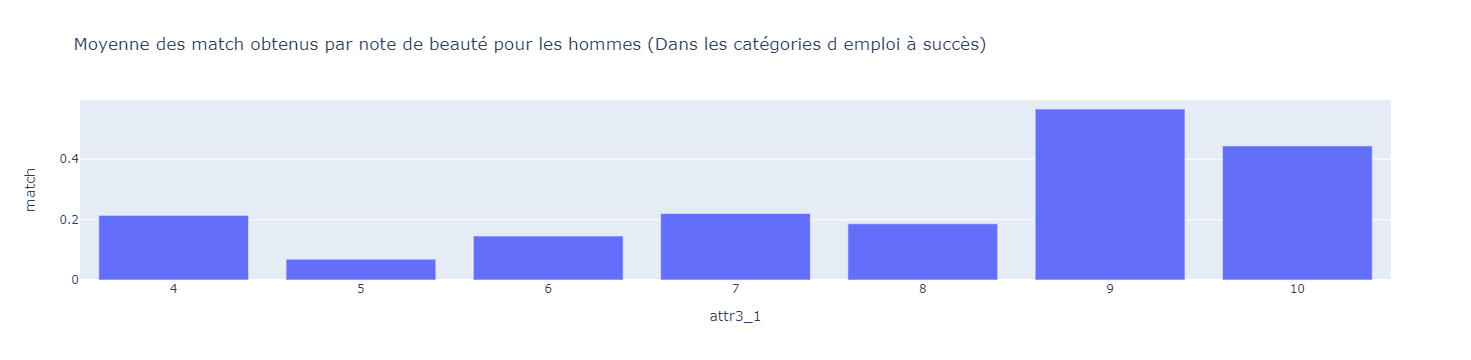

In [40]:
df_up_men = df_up[ df_up['gender'] == 1]
group_up_men = df_up_men.groupby('attr3_1')['match'].mean()
fig = px.bar(group_up_men , x = group_up_men.index , y = 'match' , title = 'Moyenne des match obtenus par note de beauté pour les hommes (Dans les catégories d emploi à succès)')
fig.show()

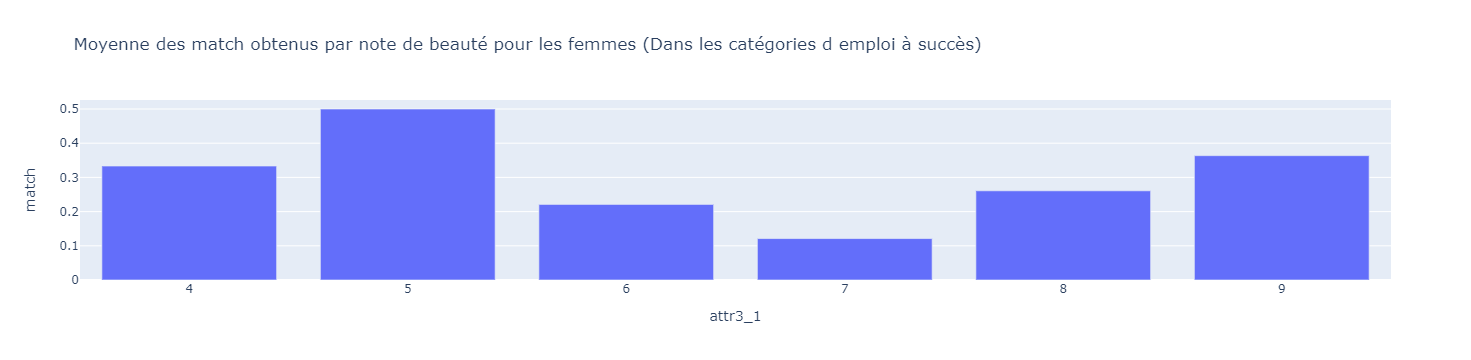

In [41]:
df_up_women = df_up[ df_up['gender'] == 0]
group_up_women = df_up_women.groupby('attr3_1')['match'].mean()
fig = px.bar(group_up_women , x = group_up_women.index , y = 'match' , title = 'Moyenne des match obtenus par note de beauté pour les femmes (Dans les catégories d emploi à succès)')
fig.show()

"Catégories professionelles à succès" : Les deux graph ci-dessus montrent qu'à priori une note beauté élevé à plus d'impact chez les hommes que chez les femmes mais les tendances n'étant pas claires, on ne peut statuer sur le fait que ce critère seul soit determinant

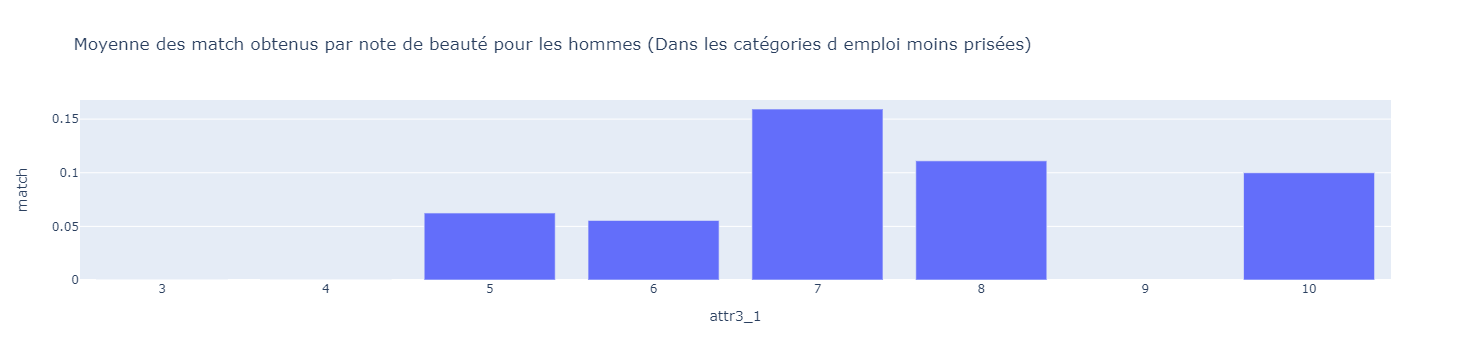

In [42]:
df_down_men = df_down[ df_down['gender'] == 1]
group_down_men = df_down_men.groupby('attr3_1')['match'].mean()
fig = px.bar(group_down_men , x = group_down_men.index , y = 'match' , title = 'Moyenne des match obtenus par note de beauté pour les hommes (Dans les catégories d emploi moins prisées)')
fig.show()

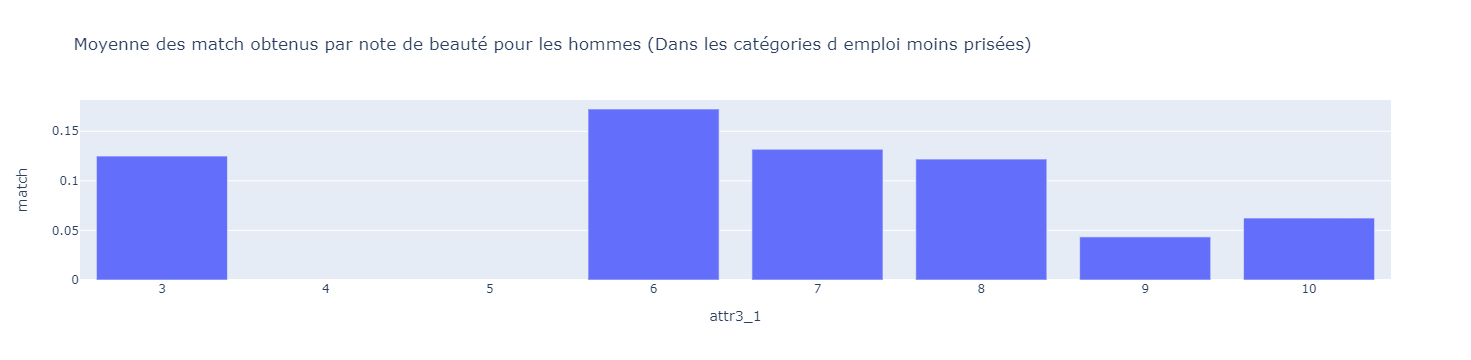

In [43]:
df_down_women = df_down[ df_down['gender'] == 0]
group_down_women = df_down_women.groupby('attr3_1')['match'].mean()
fig = px.bar(group_down_women , x = group_down_women.index , y = 'match' , title = 'Moyenne des match obtenus par note de beauté pour les hommes (Dans les catégories d emploi moins prisées)')
fig.show()

"Catégories professionelles moins prisées" : Contrairement à la catégorie précédente, il semble que la note beauté aie moins d'impact ici. Lors que la note est "haute' on pourrait noter une légère tendance à la hausse tout de même pour les hommes. Tendance qui s'inverse au contraire pour les femmes.

---------------------------------------------------------------------------------

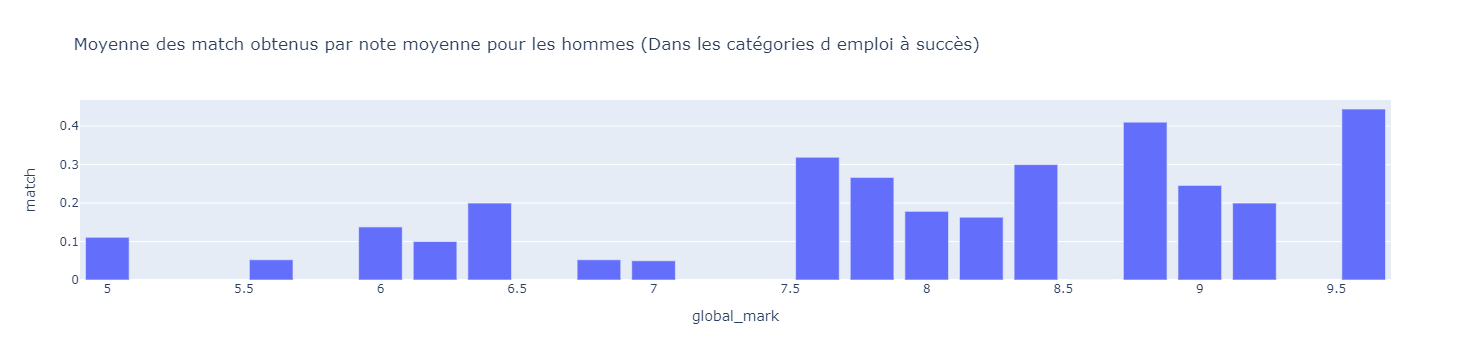

In [44]:
global_up_men = df_up_men.groupby('global_mark')['match'].mean()
fig = px.bar(global_up_men  , x = global_up_men.index , y = 'match' , title = 'Moyenne des match obtenus par note moyenne pour les hommes (Dans les catégories d emploi à succès)')
fig.show()

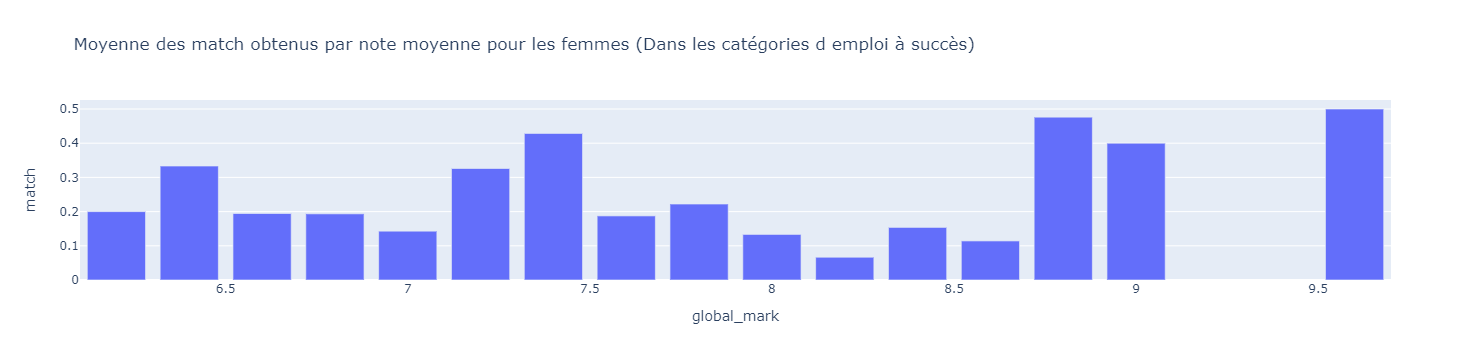

In [45]:
global_up_women = df_up_women.groupby('global_mark')['match'].mean()
fig = px.bar(global_up_women  , x = global_up_women.index , y = 'match' , title = 'Moyenne des match obtenus par note moyenne pour les femmes (Dans les catégories d emploi à succès)')
fig.show()

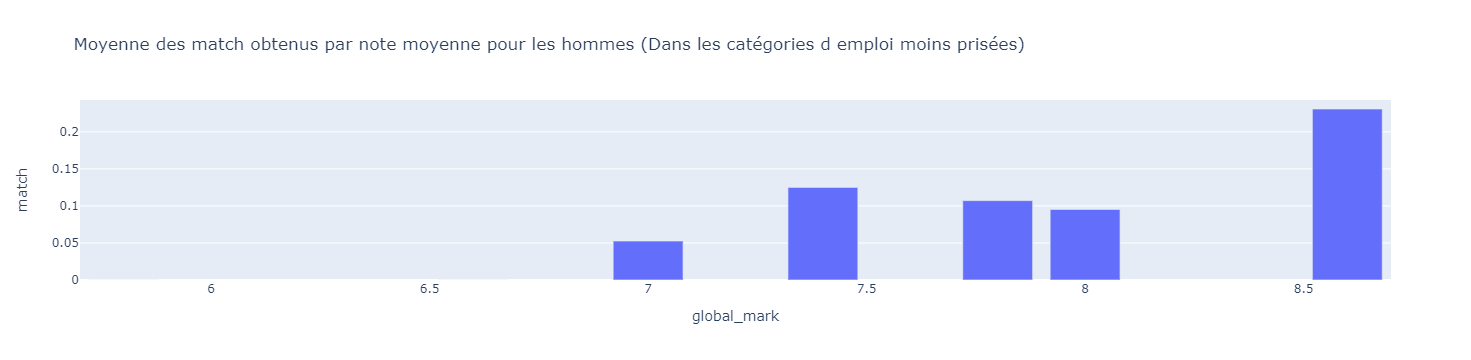

In [46]:
global_down_men = df_down_men.groupby('global_mark')['match'].mean()
fig = px.bar(global_down_men  , x = global_down_men.index , y = 'match' , title = 'Moyenne des match obtenus par note moyenne pour les hommes (Dans les catégories d emploi moins prisées)')
fig.show()

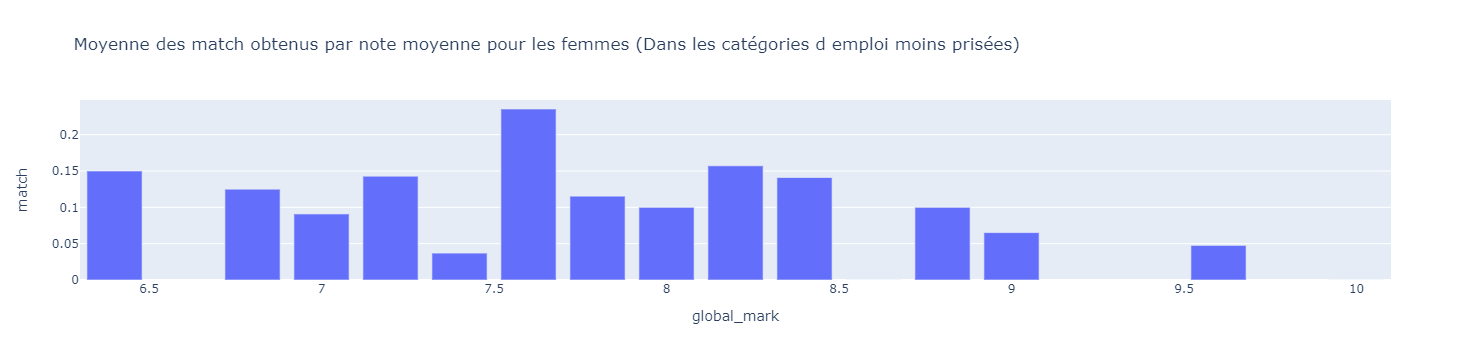

In [47]:
global_down_women = df_down_women.groupby('global_mark')['match'].mean()
fig = px.bar(global_down_women  , x = global_down_women.index , y = 'match' , title = 'Moyenne des match obtenus par note moyenne pour les femmes (Dans les catégories d emploi moins prisées)')
fig.show()

En affichant les resultats de la même manière que pour les notes de beauté mais avec la note globale, la même tendance ressort: une note elevé aura un impact certain sur les chances d'avoir un match pour un homme mais beaucoup moins d'impact pour les femmes. 

A la vue de ces derniers résultats, plusieurs questions peuvent se poser :
    - Les hommes seraient-ils moins "difficiles" que les femmes ?
    - Les femmes auraient-elles tendances à se dévaluer ?



#### Conclusion Axe 3 - Partie A: 
Tout d'abord, au sein des 2 catégories professionelles il semble que la beauté physique soit plus impactante lorsqu'il s'agit d'une homme que d'une femme. Concernant les femmes, les resultats sont plus disparates. Les tendances étant semblables entre note globale et note de beauté, on peut statuer sur le fait que les autres critères ( humour, intelligence, sincerité et ambition ) ont également leur poids dans l'equation. 

La réponse serait-elle le charisme ?

### Partie B : Impact des catégories professionelles sur les match des personnes avec des bonnes notes

J'ai conclu avec la partie A que peut importe la catégorie professionelle (prisée ou non) la beauté physique peut avoir un certain impact sur le nombre de match, ce qui n'est pas franchement etonnant. Mais on est donc en droit de se demander si, à l'inverse, la catégorie professionelle d'une "belle" personne aura un impact sur son nombre de match

In [48]:
#On va commencer par définir le scope à étudier pour la note de beauté
over_6 = dataset[dataset['attr3_1'] > 6].count()[0]
over_7 = dataset[dataset['attr3_1'] > 7].count()[0]

print(over_6)
print(over_7)

6128
3214


Il y a 6128 lignes avec une note beauté supérieur à 6 contre 3214 pour une note supérieure à 7, sur un total de +8000. On va se concentrer sur les notes supérieures à 7

In [49]:
#On va commencer par définir le scope à étudier pour la note de beauté
over_6 = dataset[dataset['global_mark'] > 6].count()[0]
over_7 = dataset[dataset['global_mark'] > 7].count()[0]

print(over_6)
print(over_7)

7921
6502


Il y a 7921 lignes avec une note globale supérieur à 6 contre 6502 pour une note supérieure à 7, sur un total de +8000.
On va se concentrer sur les lignes ou les notes beauté ET globales sont supérieure à 7 

In [50]:
df_axe3B = dataset.loc[(dataset['attr3_1'] > 7) & (dataset['global_mark'] > 7)]

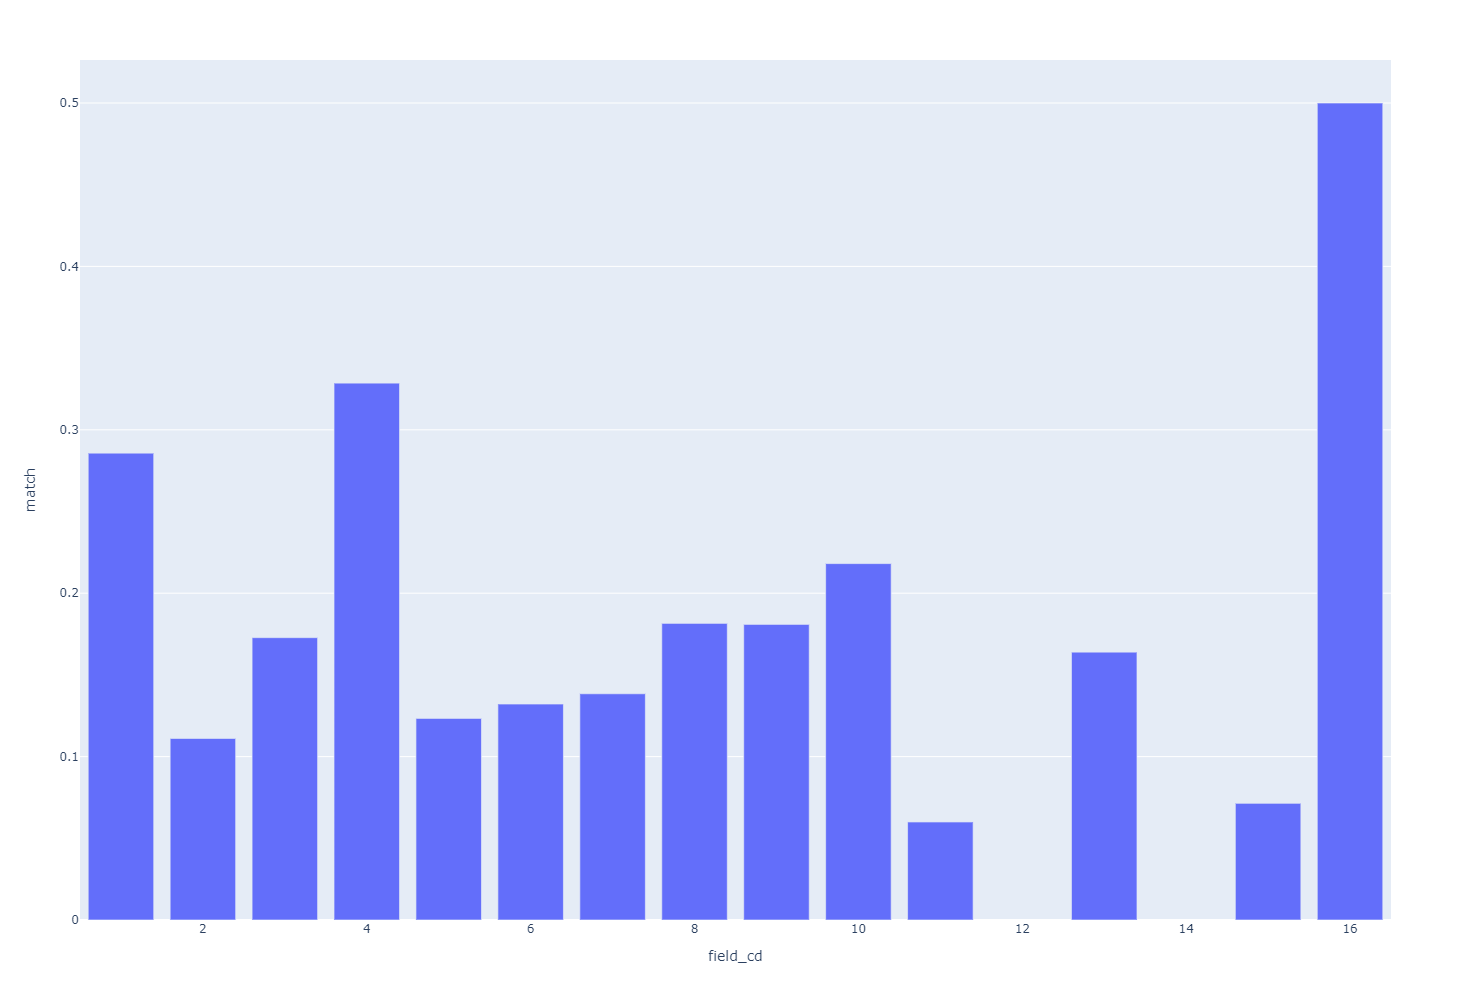

In [51]:
field_stat = df_axe3B.groupby('field_cd')['match'].mean()
fig = px.bar(field_stat, x = field_stat.index , y = 'match' , width=1200, height=1000 )

fig.show()

Pour rappel, dans le 1er graphique montrant les statistiques de match en fonction de la catégorie professionelle les catégories avec les meilleurs resultats étaient les catégories 4, 16 et 1; et celles avec les moins bons étaient les numéroes 2 , 11, 12 et 17.

Ici les catégories numéro 1 , 4 et 16 ont toujours plus de succès que leurs concurentes. Il en va de même pour les catégories 2 , 11 et 12 qui restent en bas du classement( la 17 étant apparemment absente du scope).

Il est interessant de noter que les resultat pour les catégories 1, 4 et 16 sont meilleurs ici. Elles obtiennent respectivement 0.29, 0.33 et 0.5, contre 0.2, 0.32 et 0.3 précedemment.

Tout comme le premier graphique, le reste des catégories obtiennent un nombre moyen de match semblable et moyen comparé aux autres.
La parité homme/femme n'étant pas forcement présente dans les catégories professionelles, je ne detaillerais pas en fonction des sexes.


#### Conclusion Axe 3 - Partie 2 : 
Cette dernière partie aura montré que la beauté physique seule ne suffit pas effacer le facteur du secteur professionel mais qu'elle reste un critère prédominant comme le montre l'augmentation du nombre de match sur les catégories professionelles les plus prisées.

---------------------------------------------------

### CONCLUSION GLOBALE: 

####  Avec autant de données différentes, il y avait énormement d'approches possibles. Même avec des principes "tout faits", je n'aurai pas réussi à démontrer que la beauté physique, l'assurance ou le succès étaient UNE GARANTIE de plaire à un potentiel partenaire et d'obtenir un second date. 

#### Il est evidemment que l'amour ou à minima l'attraction entre 2 personnes est bien plus complexe que ca. D'autant plus qu'un speed dating se passe dans des conditions limitées. Difficile de se faire une idée précise de la personne en face en si peu de temps. Mon étude aura clairement montré que l'impact de la beauté physique et du secteur professionel sont pertinents mais les valeurs restants globalement faibles et proches entre elles montrent que cela va bien plus loin que ces deux critères.

#### A noter qu'il semble qu'en les cumlulant les pourcentage de chance de matcher augmenter ( comme evoqué en partie 3B).

#### Une étude à l'aide de machine learning pourrait être intéressante pour aller plus loin... Mais s'il suffisait de ca pour trouver la formule de l'amour, quelqu'un l'aurait déja trouvé.